# Load candidates

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
CACHE = '/home/anhphantq/vdb/cache_train'
import os
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
train_data = []

with open(CACHE + '/metadata', 'rb') as f:
  metadata = pickle.load(f)

num_frags = min(metadata['num_frags'], 80)
max_session = metadata['max_session']


for i in tqdm(range(num_frags)):
    train_data.append(pd.read_parquet(CACHE + f'/data_{i}.parquet'))






100%|██████████| 80/80 [00:06<00:00, 12.20it/s]


In [3]:
train_data = pd.concat(train_data)

In [4]:
candidates = train_data
candidates.shape

(23119722, 157)

In [5]:
import pandas as pd
pd.set_option('display.max_columns', candidates.shape[1])

In [6]:
candidates

,user,item,num_clicks,num_carts,num_orders,item_degree,item_pr,recent_num_clicks,recent_num_carts,recent_num_orders,item_recent_degree,item_recent_pr,recent_day7_type0,recent_day7_type1,recent_day7_type2,recent_day6_type0,recent_day6_type1,recent_day6_type2,recent_day5_type0,recent_day5_type1,recent_day5_type2,recent_day4_type0,recent_day4_type1,recent_day4_type2,recent_day3_type0,recent_day3_type1,recent_day3_type2,recent_day2_type0,recent_day2_type1,recent_day2_type2,recent_day1_type0,recent_day1_type1,recent_day1_type2,item_glob_last_action,item_glob_first_action,item_glob_time_decay_sum,item_glob_time_decay_sum_click,item_glob_time_decay_sum_cart,item_glob_time_decay_sum_order,item_glob_item_glob_durability,qou_num_cosub_mean,qou_coclick_sub_coef_mean,qou_cocart_sub_coef_mean,qou_coorder_sub_coef_mean,qou_coclick_time_decay_mean,qou_cocart_time_decay_mean,qou_coorder_time_decay_mean,qou_num_appearance_mean,qou_lincom_sub_coef_1_3_10_mean,qou_lincom_time_decay_1_3_10_mean,qou_lincom_sub_coef_1_10_3_mean,qou_lincom_time_decay_1_10_3_mean,qou_lincom_sub_coef_3_1_10_mean,qou_lincom_time_decay_3_1_10_mean,qou_lincom_sub_coef_3_10_1_mean,qou_lincom_time_decay_3_10_1_mean,qou_lincom_sub_coef_10_1_3_mean,qou_lincom_time_decay_10_1_3_mean,qou_lincom_sub_coef_10_3_1_mean,qou_lincom_time_decay_10_3_1_mean,qou_num_cosub_sqrt_num_cousers,qou_coclick_sub_coef_sqrt_num_cousers,qou_cocart_sub_coef_sqrt_num_cousers,qou_coorder_sub_coef_sqrt_num_cousers,qou_coclick_time_decay_sqrt_num_cousers,qou_cocart_time_decay_sqrt_num_cousers,qou_coorder_time_decay_sqrt_num_cousers,qou_num_appearance_sqrt_num_cousers,num_sub,consistency,num_actions,user_degree,user_pr,user_recent_degree,user_recent_pr,lincom_recent_day_7_1_3_10,lincom_recent_day_7_1_10_3,lincom_recent_day_7_3_1_10,lincom_recent_day_7_3_10_1,lincom_recent_day_7_10_1_3,lincom_recent_day_7_10_3_1,lincom_recent_day_6_1_3_10,lincom_recent_day_6_1_10_3,lincom_recent_day_6_3_1_10,lincom_recent_day_6_3_10_1,lincom_recent_day_6_10_1_3,lincom_recent_day_6_10_3_1,lincom_recent_day_5_1_3_10,lincom_recent_day_5_1_10_3,lincom_recent_day_5_3_1_10,lincom_recent_day_5_3_10_1,lincom_recent_day_5_10_1_3,lincom_recent_day_5_10_3_1,lincom_recent_day_4_1_3_10,lincom_recent_day_4_1_10_3,lincom_recent_day_4_3_1_10,lincom_recent_day_4_3_10_1,lincom_recent_day_4_10_1_3,lincom_recent_day_4_10_3_1,lincom_recent_day_3_1_3_10,lincom_recent_day_3_1_10_3,lincom_recent_day_3_3_1_10,lincom_recent_day_3_3_10_1,lincom_recent_day_3_10_1_3,lincom_recent_day_3_10_3_1,lincom_recent_day_2_1_3_10,lincom_recent_day_2_1_10_3,lincom_recent_day_2_3_1_10,lincom_recent_day_2_3_10_1,lincom_recent_day_2_10_1_3,lincom_recent_day_2_10_3_1,lincom_recent_day_1_1_3_10,lincom_recent_day_1_1_10_3,lincom_recent_day_1_3_1_10,lincom_recent_day_1_3_10_1,lincom_recent_day_1_10_1_3,lincom_recent_day_1_10_3_1,fitness,inter_clicks,inter_carts,inter_orders,inter_num_sub,inter_time_decay,inter_lts,inter_fts,inter_durability,inter_num_interacts,recent_inter_day7_type0,recent_inter_day7_type1,recent_inter_day7_type2,recent_inter_day6_type0,recent_inter_day6_type1,recent_inter_day6_type2,recent_inter_day5_type0,recent_inter_day5_type1,recent_inter_day5_type2,recent_inter_day4_type0,recent_inter_day4_type1,recent_inter_day4_type2,recent_inter_day3_type0,recent_inter_day3_type1,recent_inter_day3_type2,recent_inter_day2_type0,recent_inter_day2_type1,recent_inter_day2_type2,recent_inter_day1_type0,recent_inter_day1_type1,recent_inter_day1_type2,is_level1,weight_covisit_day1,weight_covisit_day2,weight_covisit_day3,weight_covisit_day4,weight_covisit_day5,weight_covisit_day6,weight_covisit_day7,weight_covisit_1week
0,12085722.0,12909463.0,6768.0,704.0,292.0,5160.0,2.116035e-05,2406.0,291.0,129.0,1778.0,1.658272e-05,365.0,35.0,16.0,264.0,32.0,15.0,471.0,37.0,17.0,272.0,35.0,19.0,237.0,31.0,10.0,262.0,21.0,16.0,261.0,35.0,20.0,20.998785,0.000255,3345.636475,2906.302734,308.217957,131.115784,20.998529,0.256410,0.338130,0.000000,0.00000,0.274977,0.000000,0.000000,0

# Train params

In [7]:
from meow_utils import *
from catboost.utils import eval_metric

PARAMS = {
    'learning_rate': 0.5,
    'iterations': 1000,
    'early_stopping_rounds' : 5,
    'max_bin': 256,
    'depth': 7,
    'eval_metric': 'RecallAt:top=20',
    'use_best_model': True,

}
N_SPLITS = 3
MODEL_PATH = '/home/anhphantq/meowmeow'
VERSION = '2'

# Train for each type

In [8]:
from meow_utils import get_len_group

In [9]:
candidates

,user,item,num_clicks,num_carts,num_orders,item_degree,item_pr,recent_num_clicks,recent_num_carts,recent_num_orders,item_recent_degree,item_recent_pr,recent_day7_type0,recent_day7_type1,recent_day7_type2,recent_day6_type0,recent_day6_type1,recent_day6_type2,recent_day5_type0,recent_day5_type1,recent_day5_type2,recent_day4_type0,recent_day4_type1,recent_day4_type2,recent_day3_type0,recent_day3_type1,recent_day3_type2,recent_day2_type0,recent_day2_type1,recent_day2_type2,recent_day1_type0,recent_day1_type1,recent_day1_type2,item_glob_last_action,item_glob_first_action,item_glob_time_decay_sum,item_glob_time_decay_sum_click,item_glob_time_decay_sum_cart,item_glob_time_decay_sum_order,item_glob_item_glob_durability,qou_num_cosub_mean,qou_coclick_sub_coef_mean,qou_cocart_sub_coef_mean,qou_coorder_sub_coef_mean,qou_coclick_time_decay_mean,qou_cocart_time_decay_mean,qou_coorder_time_decay_mean,qou_num_appearance_mean,qou_lincom_sub_coef_1_3_10_mean,qou_lincom_time_decay_1_3_10_mean,qou_lincom_sub_coef_1_10_3_mean,qou_lincom_time_decay_1_10_3_mean,qou_lincom_sub_coef_3_1_10_mean,qou_lincom_time_decay_3_1_10_mean,qou_lincom_sub_coef_3_10_1_mean,qou_lincom_time_decay_3_10_1_mean,qou_lincom_sub_coef_10_1_3_mean,qou_lincom_time_decay_10_1_3_mean,qou_lincom_sub_coef_10_3_1_mean,qou_lincom_time_decay_10_3_1_mean,qou_num_cosub_sqrt_num_cousers,qou_coclick_sub_coef_sqrt_num_cousers,qou_cocart_sub_coef_sqrt_num_cousers,qou_coorder_sub_coef_sqrt_num_cousers,qou_coclick_time_decay_sqrt_num_cousers,qou_cocart_time_decay_sqrt_num_cousers,qou_coorder_time_decay_sqrt_num_cousers,qou_num_appearance_sqrt_num_cousers,num_sub,consistency,num_actions,user_degree,user_pr,user_recent_degree,user_recent_pr,lincom_recent_day_7_1_3_10,lincom_recent_day_7_1_10_3,lincom_recent_day_7_3_1_10,lincom_recent_day_7_3_10_1,lincom_recent_day_7_10_1_3,lincom_recent_day_7_10_3_1,lincom_recent_day_6_1_3_10,lincom_recent_day_6_1_10_3,lincom_recent_day_6_3_1_10,lincom_recent_day_6_3_10_1,lincom_recent_day_6_10_1_3,lincom_recent_day_6_10_3_1,lincom_recent_day_5_1_3_10,lincom_recent_day_5_1_10_3,lincom_recent_day_5_3_1_10,lincom_recent_day_5_3_10_1,lincom_recent_day_5_10_1_3,lincom_recent_day_5_10_3_1,lincom_recent_day_4_1_3_10,lincom_recent_day_4_1_10_3,lincom_recent_day_4_3_1_10,lincom_recent_day_4_3_10_1,lincom_recent_day_4_10_1_3,lincom_recent_day_4_10_3_1,lincom_recent_day_3_1_3_10,lincom_recent_day_3_1_10_3,lincom_recent_day_3_3_1_10,lincom_recent_day_3_3_10_1,lincom_recent_day_3_10_1_3,lincom_recent_day_3_10_3_1,lincom_recent_day_2_1_3_10,lincom_recent_day_2_1_10_3,lincom_recent_day_2_3_1_10,lincom_recent_day_2_3_10_1,lincom_recent_day_2_10_1_3,lincom_recent_day_2_10_3_1,lincom_recent_day_1_1_3_10,lincom_recent_day_1_1_10_3,lincom_recent_day_1_3_1_10,lincom_recent_day_1_3_10_1,lincom_recent_day_1_10_1_3,lincom_recent_day_1_10_3_1,fitness,inter_clicks,inter_carts,inter_orders,inter_num_sub,inter_time_decay,inter_lts,inter_fts,inter_durability,inter_num_interacts,recent_inter_day7_type0,recent_inter_day7_type1,recent_inter_day7_type2,recent_inter_day6_type0,recent_inter_day6_type1,recent_inter_day6_type2,recent_inter_day5_type0,recent_inter_day5_type1,recent_inter_day5_type2,recent_inter_day4_type0,recent_inter_day4_type1,recent_inter_day4_type2,recent_inter_day3_type0,recent_inter_day3_type1,recent_inter_day3_type2,recent_inter_day2_type0,recent_inter_day2_type1,recent_inter_day2_type2,recent_inter_day1_type0,recent_inter_day1_type1,recent_inter_day1_type2,is_level1,weight_covisit_day1,weight_covisit_day2,weight_covisit_day3,weight_covisit_day4,weight_covisit_day5,weight_covisit_day6,weight_covisit_day7,weight_covisit_1week
0,12085722.0,12909463.0,6768.0,704.0,292.0,5160.0,2.116035e-05,2406.0,291.0,129.0,1778.0,1.658272e-05,365.0,35.0,16.0,264.0,32.0,15.0,471.0,37.0,17.0,272.0,35.0,19.0,237.0,31.0,10.0,262.0,21.0,16.0,261.0,35.0,20.0,20.998785,0.000255,3345.636475,2906.302734,308.217957,131.115784,20.998529,0.256410,0.338130,0.000000,0.00000,0.274977,0.000000,0.000000,0

In [10]:
import pandas as pd 
import numpy as np
tar = pd.read_parquet('/home/anhphantq/otto/splitted_data/test_labels.parquet')
tar = tar.loc[(tar['session'] <= candidates['user'].max()) & (tar['session'] >= candidates['user'].min()) ]
aids = tar.ground_truth.explode().astype('int32').rename('item')
tar = tar[['session', 'type']].rename({'session':'user'},axis=1)
tar = tar.merge(aids, left_index=True, right_index=True, how='left')
tar['type'] = tar['type'].apply(lambda x: 0 if x == 'clicks' else 1 if x == 'carts' else 2)
tar['label'] = 1
tar['item'] = tar['item'] + max_session
tar['user_type'] = tar['user'] * 10 + tar['type']

In [11]:
num_cands = candidates[['user', 'item']].groupby('user').count().reset_index()
num_cands['num_cands'] = num_cands['item']
del num_cands['item'] 

num_cands = candidates.merge(num_cands,on=['user'],how='left')['num_cands'].values


In [12]:
labels = []
for i in range(3):
  tar_small = tar[tar['type'] == i]
  
  labels.append(candidates.merge(tar_small[['item', 'label', 'user']],on=['user','item'],how='left').fillna(0)['label'].values.astype(int))
  
  



In [13]:
from sklearn.model_selection import GroupKFold
import os
import matplotlib.pyplot as plt
import shutil
from meow_utils import plot_importance
from catboost import CatBoostRanker, Pool, EShapCalcType, EFeaturesSelectionAlgorithm
import seaborn as sns
sns.set()
%matplotlib inline
def train(t, id_type):
  global candidates, num_cands, labels
  name = f'/{t}_only_'
  try:
    shutil.rmtree(MODEL_PATH + name + VERSION)
  except:
    pass
  else:
    print('remove old version')
  fig, axs = plt.subplots(1, 3, figsize = (70, 10))
  skf = GroupKFold(n_splits=N_SPLITS)
  for fold,(train_idx, valid_idx) in enumerate(skf.split(candidates, labels[id_type], groups=candidates['user'] )):

      X_train = candidates.iloc[train_idx, 2:]
      y_train = labels[id_type][train_idx]
      X_valid = candidates.iloc[valid_idx, 2:]
      y_valid = labels[id_type][valid_idx]

      dtrain = Pool(X_train, y_train, thread_count = os.cpu_count(), group_id = candidates.iloc[train_idx, 0].astype(int)) 
      dvalid = Pool(X_valid, y_valid, thread_count = os.cpu_count(), group_id = candidates.iloc[valid_idx, 0].astype(int))
      
      params = {'thread_count' : os.cpu_count(),
      **PARAMS}
      model = CatBoostRanker(**params)
      model.fit(dtrain, eval_set = dvalid)
      try:
        os.mkdir(MODEL_PATH + name + VERSION)
      except:
        pass
      
      plot_importance(X_train.columns.tolist(), model.get_feature_importance(data = dvalid, type = 'LossFunctionChange'), ax = axs[fold])
      axs[fold].bar_label(axs[fold].containers[0])
      model.save_model(MODEL_PATH + name + VERSION + f'/meowmewo_fold{fold}')
  


remove old version
0:	learn: 0.7956661	test: 0.7998286	best: 0.7998286 (0)	total: 3.64s	remaining: 1h 40s
1:	learn: 0.8233490	test: 0.8281145	best: 0.8281145 (1)	total: 6.61s	remaining: 54m 58s
2:	learn: 0.8280633	test: 0.8324003	best: 0.8324003 (2)	total: 9.74s	remaining: 53m 58s
3:	learn: 0.8281570	test: 0.8324003	best: 0.8324003 (2)	total: 12.4s	remaining: 51m 33s
4:	learn: 0.8304606	test: 0.8342753	best: 0.8342753 (4)	total: 15.6s	remaining: 51m 38s
5:	learn: 0.8314650	test: 0.8355878	best: 0.8355878 (5)	total: 18.5s	remaining: 51m 11s
6:	learn: 0.8331124	test: 0.8376236	best: 0.8376236 (6)	total: 21.1s	remaining: 49m 48s
7:	learn: 0.8352150	test: 0.8395521	best: 0.8395521 (7)	total: 23.6s	remaining: 48m 45s
8:	learn: 0.8363668	test: 0.8403289	best: 0.8403289 (8)	total: 26.3s	remaining: 48m 13s
9:	learn: 0.8372909	test: 0.8412397	best: 0.8412397 (9)	total: 29.2s	remaining: 48m 15s
10:	learn: 0.8375722	test: 0.8415343	best: 0.8415343 (10)	total: 31.7s	remaining: 47m 26s
11:	learn: 0

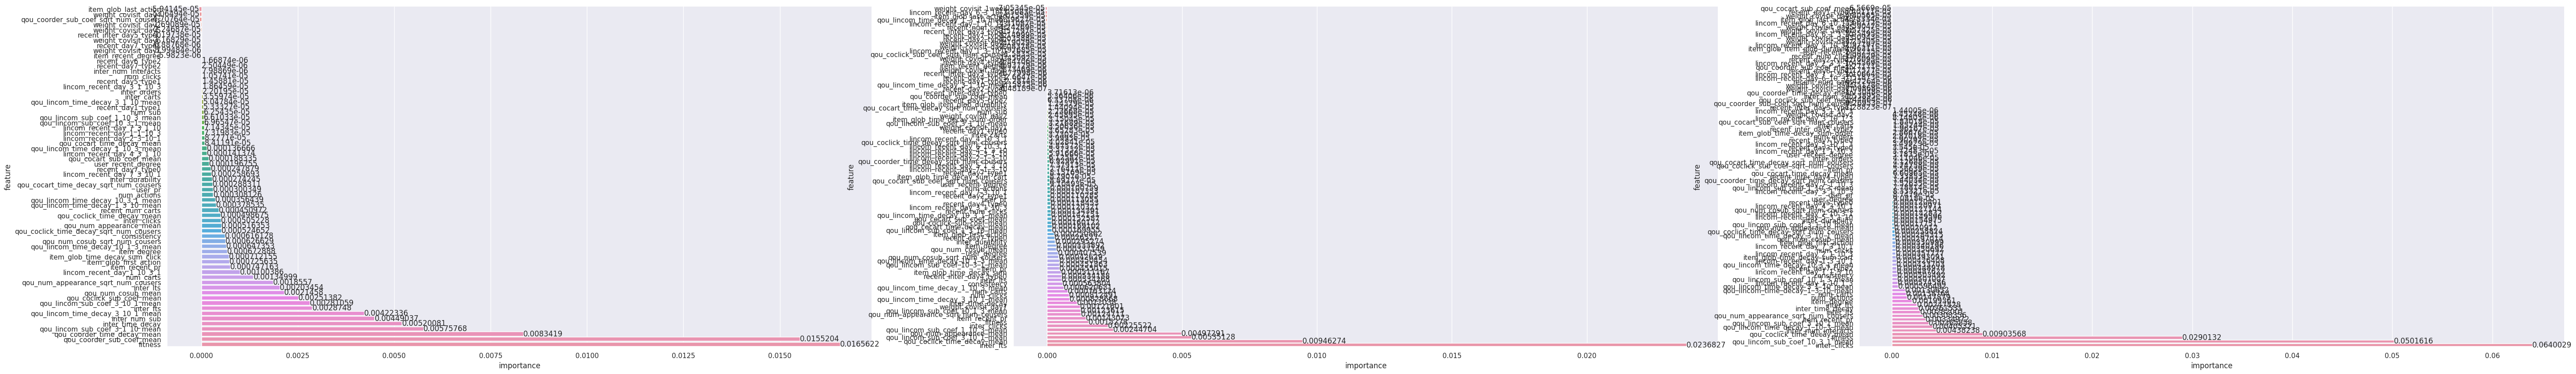

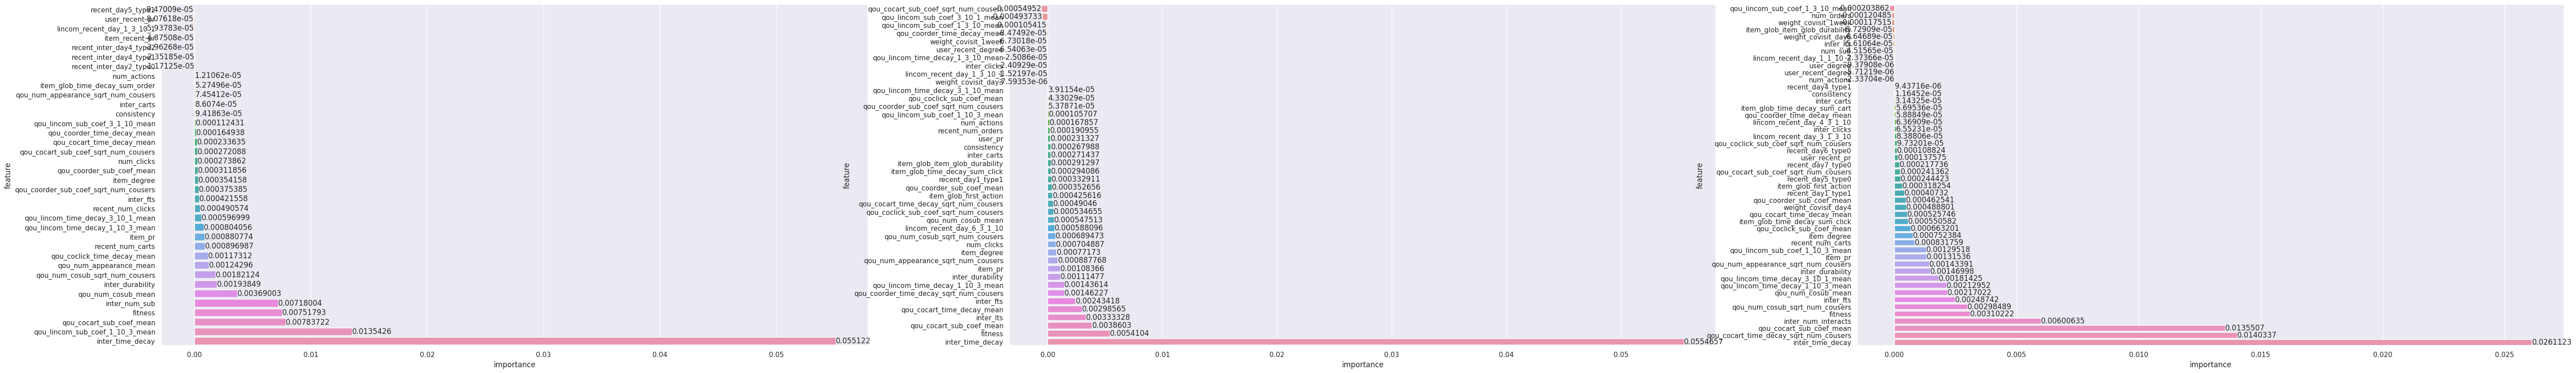

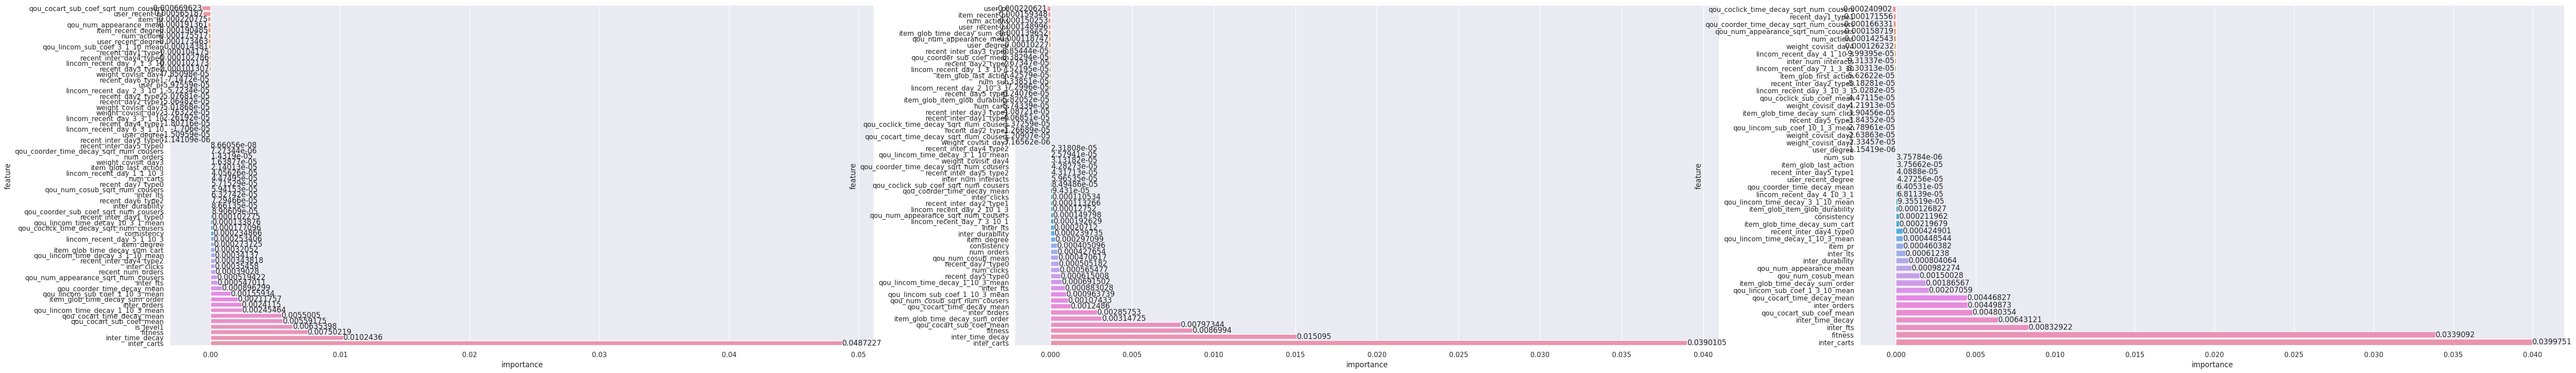

In [14]:
for id_type, t in enumerate(['clicks', 'carts', 'orders']):
  train(t, id_type)